In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_ocr
from tensorflow.keras.layers import TextVectorization
import pickle

%matplotlib inline

In [3]:
model = tf.keras.models.load_model('toxic_text_classification.h5')

In [4]:
from_disk = pickle.load(open("tv_layer.pkl", "rb"))
vectorizer = TextVectorization(max_tokens=from_disk['config']['max_tokens'],
                                          output_mode=from_disk['config']['output_mode'],
                                          output_sequence_length=from_disk['config']['output_sequence_length'])
vectorizer.adapt(tf.data.Dataset.from_tensor_slices(["xyz"]))
vectorizer.set_weights(from_disk['weights'])

In [8]:
#To get the output as text or string
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    text = ''
    for idx, col in enumerate(level):
        text +='{}: {}\n'.format(col, results[0][idx]>0.5)
    if text == '':
        text += 'Non-toxic '
        
    return text

In [9]:
#To get the output as a dictiory
def is_toxic(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    result = {}
    toxic_level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    for level,res in zip(toxic_level,results[0]):
        result[level]=res>0.5
    if not result:
        result['Non-toxic':True]
    return result

In [10]:
#To get the output as a list of vau
def toxic_values(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    result = []
    toxic_level = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    for idx,res in enumerate(results[0]):
        if res>0.5:
            result.append(toxic_level[idx])
    if not result:
        result.append('Non-toxic')
    return result

In [11]:
comment = "you are a moron "
print(toxic_values(comment))

1/1 [==============================] - 4s 4s/step
['toxic', 'obscene', 'insult']


In [12]:
#Image detection
def ocr_toxic(image):
    pipeline = keras_ocr.pipeline.Pipeline()
    prediction_groups = pipeline.recognize([image])
    keras_ocr.tools.drawAnnotations(plt.imread(set_images), prediction_groups[0])
    predicted_image = prediction_groups[0]
    st = ''
    for text, box in predicted_image:
        print(text)
        st += text
        st += ' '
    print("The text is ",st)
    print(toxic_values(st))

Looking for C:\Users\thala\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\thala\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 10s 10s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


you
are
moron
a
aa
gle
send
The text is  you are moron a aa gle send 
1/1 [==============================] - 0s 218ms/step
['toxic', 'obscene', 'insult']


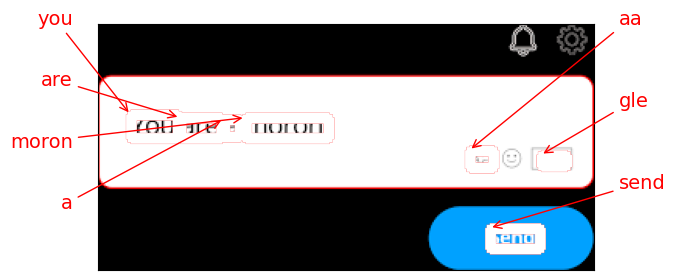

In [14]:
set_images = 'toxic_1.png'
ocr_toxic(set_images)